### **Chargement des packages et du dataset**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_excel('heart-dataset.xlsx')
df = data.copy()
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']

### **Preprocessing Niveau 0**

In [3]:
df['sexe'] = df['sexe'].map({"homme":1,"femme":0})
df['type_douleur_thoracique'] = df['type_douleur_thoracique'].map({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['résultats_electrocardiogramme'] = df['résultats_electrocardiogramme'].map({'Normal':0,'LVH':1,'ST':2})
df['angine'] = df['angine'].map({'Oui':0,'Non':1})
df['pente_du_segment_ST_exercice'] = df['pente_du_segment_ST_exercice'].map({'Plat':0,'Ascendant':1,'Descendant':2})
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,1,2,140,289,0,0,172,1,0.0,1,0
1,49,0,1,160,180,0,0,156,1,1.0,0,1
2,37,1,2,130,283,0,2,98,1,0.0,1,0
3,48,0,0,138,214,0,0,108,0,1.5,0,1
4,54,1,1,150,195,0,0,122,1,0.0,1,0


### **Nommenclatures des différents Modèles**

In [4]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

In [5]:
def courbe_d_apprentissage(clf,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1'):
    var, train_score, val_score = learning_curve(clf,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
    plt.figure(figsize=(12,8))
    plt.title('Learning Curve')
    plt.plot(var, train_score.mean(axis = 1), label = 'Train')
    plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
    plt.xlabel('Train_size')
    plt.legend()
    plt.show()

In [6]:
# def resume(clf, X_test, X_train, y_test, y_train):
#     test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
#     train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

#     results_df = pd.DataFrame(data=[[clf.fit(X_train, y_train), train_score, test_score]], 
#                               columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#     return results_df

In [7]:
X = df.drop(columns= "presence_maladie_cardiaque" , axis = 1)
Y = df["presence_maladie_cardiaque"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Maintenant que nos données sont divisées en ensembles d'entraînement et de test, il est temps de créer un modèle d'apprentissage automatique.

Nous allons l'entraîner (trouver les modèles) sur l'ensemble d'entraînement.

Et nous allons le tester (utiliser les modèles) sur l'ensemble de test.

Nous allons essayer 5 modèles de machine learning différents :

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Support Vector machine
4. Decision Tree Classifier
5. Random Forest Classifier





### **1. Regression Logistique**

In [8]:
model = LogisticRegression(solver='liblinear',random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [9]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.848024    0.866667  0.858311    0.857345      0.858209
recall       0.837838    0.875312  0.858311    0.856575      0.858311
f1-score     0.842900    0.870968  0.858311    0.856934      0.858234
support    333.000000  401.000000  0.858311  734.000000    734.000000
_______________________________________________
Confusion Matrix: 
 [[279  54]
 [ 50 351]]

Test Result:
Accuracy Score: 85.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.784091    0.916667  0.853261    0.850379      0.861187
recall      0.896104    0.822430  0.853261    0.859267      0.853261
f1-score    0.836364    0.866995  0.853261    0.851679      0.854176
support    77.000000  107.000000  0.853261  184.000000    184.00000

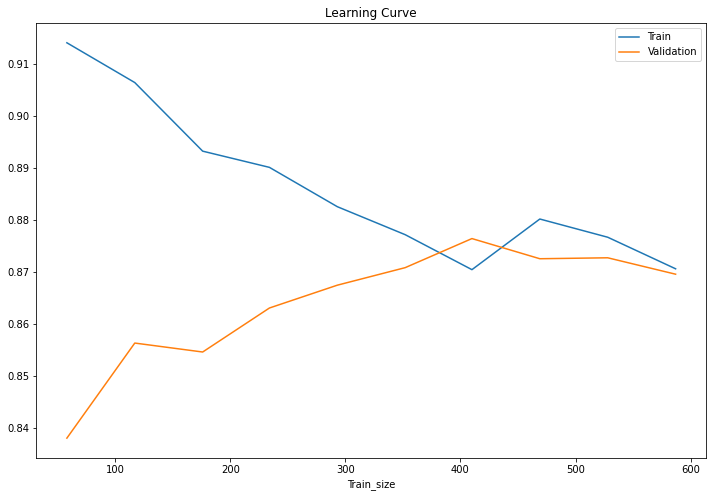

In [10]:
courbe_d_apprentissage(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')

In [11]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'],)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.831063,85.326087


### **2. K-voisins les plus proches**

In [12]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.788644    0.800959   0.79564    0.794801      0.795372
recall       0.750751    0.832918   0.79564    0.791834      0.795640
f1-score     0.769231    0.816626   0.79564    0.792928      0.795124
support    333.000000  401.000000   0.79564  734.000000    734.000000
_______________________________________________
Confusion Matrix: 
 [[250  83]
 [ 67 334]]

Test Result:
Accuracy Score: 70.65%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.632184    0.773196  0.706522    0.702690      0.714185
recall      0.714286    0.700935  0.706522    0.707610      0.706522
f1-score    0.670732    0.735294  0.706522    0.703013      0.708276
support    77.000000  107.000000  0.706522  184.000000    184.00000

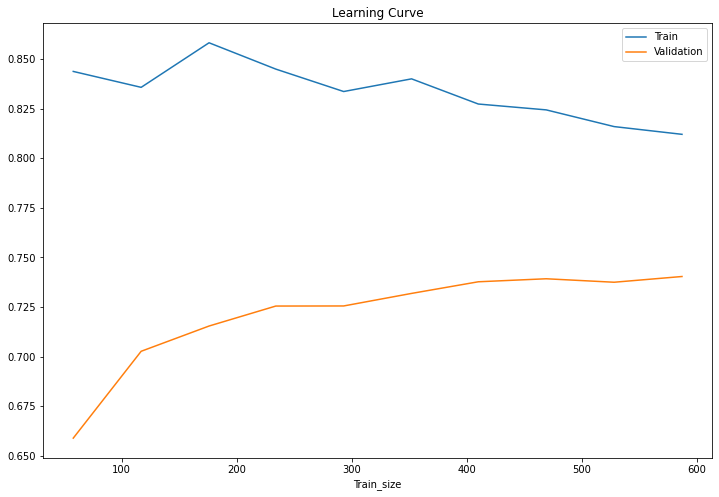

In [14]:
courbe_d_apprentissage(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')

In [15]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.831063,85.326087
1,K-nearest neighbors,79.564033,70.652174


### **3. Support Vector machine**

In [16]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [17]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 73.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.699708    0.762148   0.73297    0.730928      0.733821
recall       0.720721    0.743142   0.73297    0.731931      0.732970
f1-score     0.710059    0.752525   0.73297    0.731292      0.733259
support    333.000000  401.000000   0.73297  734.000000    734.000000
_______________________________________________
Confusion Matrix: 
 [[240  93]
 [103 298]]

Test Result:
Accuracy Score: 68.48%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.606742    0.757895  0.684783    0.682318      0.694640
recall      0.701299    0.672897  0.684783    0.687098      0.684783
f1-score    0.650602    0.712871  0.684783    0.681737      0.686813
support    77.000000  107.000000  0.684783  184.000000    184.00000

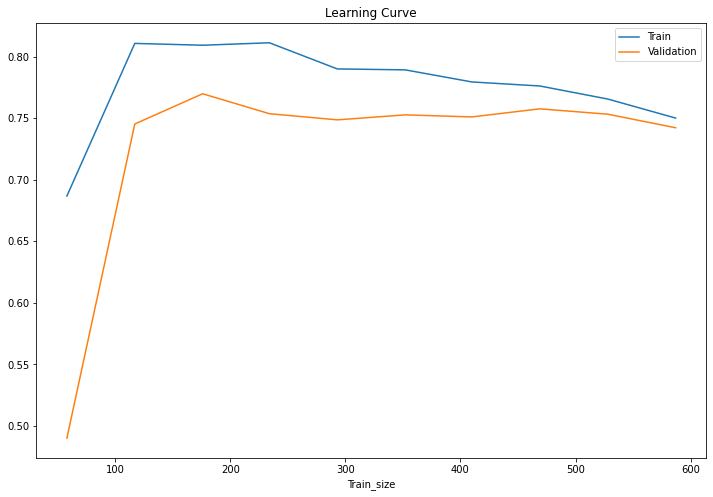

In [18]:
courbe_d_apprentissage(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')

In [19]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.831063,85.326087
1,K-nearest neighbors,79.564033,70.652174
2,Support Vector Machine,73.297003,68.478261


### **4. Classificateur d'arbre de décision**

In [20]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    333.0  401.0       1.0      734.0         734.0
_______________________________________________
Confusion Matrix: 
 [[333   0]
 [  0 401]]

Test Result:
Accuracy Score: 82.07%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.755814    0.877551  0.820652    0.816682      0.826607
recall      0.844156    0.803738  0.820652    0.823947      0.820652
f1-score    0.797546    0.839024  0.820652    0.818285      0.821667
support    77.000000  107.000000  0.820652  184.000000    184.000000
_______________________________________________
Conf

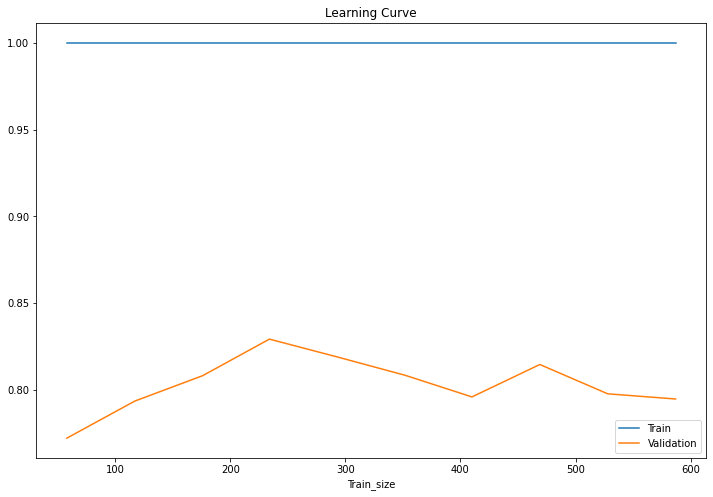

In [22]:
courbe_d_apprentissage(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')

In [23]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.831063,85.326087
1,K-nearest neighbors,79.564033,70.652174
2,Support Vector Machine,73.297003,68.478261
3,Decision Tree Classifier,100.000000,82.065217


### **5. Forêt aléatoire**

In [24]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [25]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    333.0  401.0       1.0      734.0         734.0
_______________________________________________
Confusion Matrix: 
 [[333   0]
 [  0 401]]

Test Result:
Accuracy Score: 88.59%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.850000    0.913462   0.88587    0.881731      0.886904
recall      0.883117    0.887850   0.88587    0.885484      0.885870
f1-score    0.866242    0.900474   0.88587    0.883358      0.886149
support    77.000000  107.000000   0.88587  184.000000    184.000000
_______________________________________________
Conf

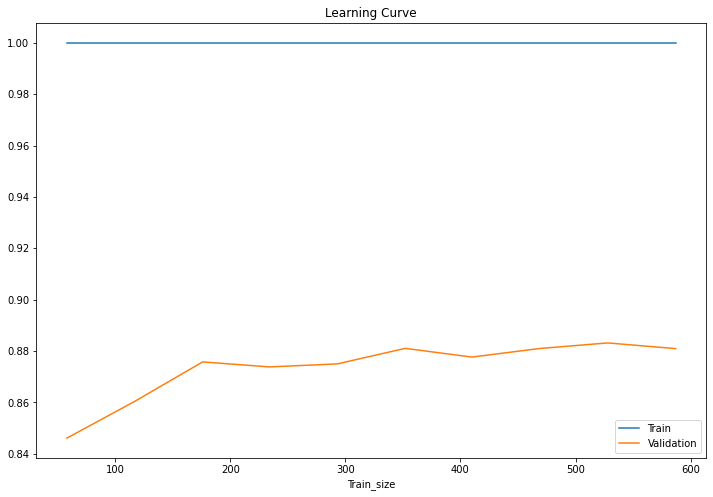

In [26]:
courbe_d_apprentissage(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')

In [27]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.831063,85.326087
1,K-nearest neighbors,79.564033,70.652174
2,Support Vector Machine,73.297003,68.478261
3,Decision Tree Classifier,100.000000,82.065217
4,Random Forest Classifier,100.000000,88.586957


### **6. Classification naïve bayésienne**

In [30]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [31]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.844512    0.862069  0.854223    0.853291      0.854104
recall       0.831832    0.872818  0.854223    0.852325      0.854223
f1-score     0.838124    0.867410  0.854223    0.852767      0.854124
support    333.000000  401.000000  0.854223  734.000000    734.000000
_______________________________________________
Confusion Matrix: 
 [[277  56]
 [ 51 350]]

Test Result:
Accuracy Score: 83.70%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.770115    0.896907  0.836957    0.833511      0.843847
recall      0.870130    0.813084  0.836957    0.841607      0.836957
f1-score    0.817073    0.852941  0.836957    0.835007      0.837931
support    77.000000  107.000000  0.836957  184.000000    184.00000

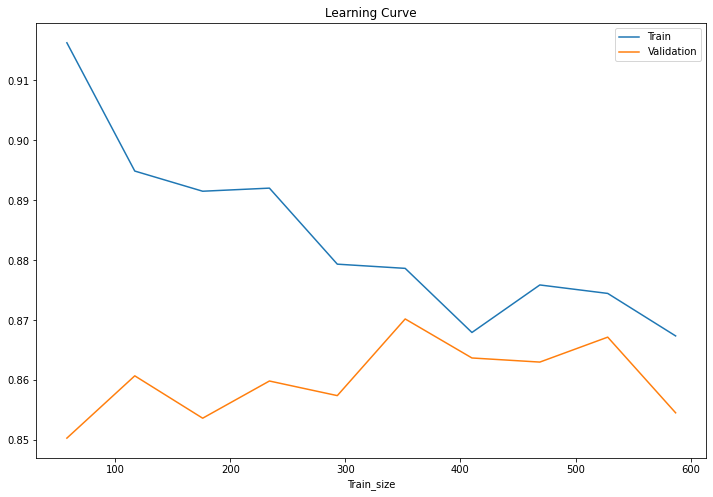

In [32]:
courbe_d_apprentissage(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')

In [33]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GaussianNB", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.831063,85.326087
1,K-nearest neighbors,79.564033,70.652174
2,Support Vector Machine,73.297003,68.478261
3,Decision Tree Classifier,100.000000,82.065217
4,Random Forest Classifier,100.000000,88.586957
5,GaussianNB,85.422343,83.695652


### **Preprocessing Niveau 1**

In [35]:
cols_quanti = ['age','pression_artérielle','cholesterol','résultats_electrocardiogramme','fréquence_cardiaque_maximale','depression']
normalizer = StandardScaler()
df[cols_quanti] = normalizer.fit_transform(df[cols_quanti].values)
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,-1.433140,1,2,0.410909,0.825070,0,-0.747055,1.382928,1,-0.832432,1,0
1,-0.478484,0,1,1.491752,-0.171961,0,-0.747055,0.754157,1,0.105664,0,1
2,-1.751359,1,2,-0.129513,0.770188,0,1.774257,-1.525138,1,-0.832432,1,0
3,-0.584556,0,0,0.302825,0.139040,0,-0.747055,-1.132156,0,0.574711,0,1
4,0.051881,1,1,0.951331,-0.034755,0,-0.747055,-0.581981,1,-0.832432,1,0


In [ ]:
X = df.drop(columns= "presence_maladie_cardiaque" , axis = 1)
Y = df["presence_maladie_cardiaque"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

In [ ]:
model = LogisticRegression(solver='liblinear',random_state=42)
model.fit(X_train,y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
confusion_matrix_1 = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
confusion_matrix_1

In [ ]:
confusion_matrix_1 = np.array(confusion_matrix_1)
total=sum(sum(confusion_matrix_1))

sensibilite = confusion_matrix_1[0,0]/(confusion_matrix_1[0,0]+confusion_matrix_1[1,0])
print('sensibilite : ', sensibilite)

specificite = confusion_matrix_1[1,1]/(confusion_matrix_1[1,1]+confusion_matrix_1[0,1])
print('specificite : ', specificite)

In [ ]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, scoring='f1')
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

## Résultats du Prepossessing & Modelisation

**1ère Modelisation**

> Matrice de confusion
- Sur un total de 77 personnes qui n'ont pas de maladie cardiaque, on a pu identifier correctement 68 personnes et on a fait 9 erreurs donc 9 personnes qui ont effectivement la maladie cardiaque mais ont été dectecté comme ne pas avoir la maladie (attention).

- De même sur un total de 107 personnes qui souffre de maladie cardiaque, on a pu identifier correctement 88 personnes et on a fait 19 erreurs donc 19 personnes qui ont n'ont pas la maladie cardiaque mais ont été dectecté comme avoir la maladie.

> Courbe d'apprentissage